In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 家電  

## 液晶テレビ

### 時刻別消費電力量
$$
E_{ Elc, TV_{ LED }, d, t } = ( P_{ Elc, TV_{ LED }, standby } \times t_{ TV_{ LED }, standby, d, t } + P_{ Elc, TV_{ LED }, view } \times t_{ TV_{ LED }, view, d, t }  ) \times 10^{ -3 }
$$

$ E_{ Elc, TV_{ LED }, d, t } $：日付dの時刻tにおける液晶テレビの消費電力量,kWh  
$ P_{ Elc, TV_{ LED }, standby } $：液晶テレビの待機時の消費電力,W  
$ t_{ TV_{ LED }, standby, d, t } $：日付dの時刻tにおける液晶テレビの待機時間,h  
$ P_{ Elc, TV_{ LED }, view } $：液晶テレビの視聴時の消費電力,W  
$ t_{ TV_{ LED }, view, d, t } $：日付dの時刻tにおける液晶テレビの視聴時間,h  
$ 10^{ -3 } $：単位換算,Wh -> kWh

In [24]:
def get_E_Elc_tv_led_d_t(P_Elc_tv_led_standby_rtd, t_tv_led_standby_d_t, P_Elc_tv_led_view_rtd, t_tv_led_view_d_t, number_of_people):
    """時刻別消費電力量を計算する
    
    Parameters
    ----------
    P_Elc_tv_led_standby_rtd : float
        液晶テレビの定格待機電力, W
        
    P_Elc_tv_led_view_rtd : float
        液晶テレビの定格視聴電力, W
        
    t_tv_led_standby_d_t : ndarray(N-dimensional array)
        1年間の全時間の待機時間を格納したND配列, h
        d日t時の待機時間が年開始時から8760個連続して格納されている

    t_tv_led_view_d_t : ndarray(N-dimensional array)
        1年間の全時間の視聴時間を格納したND配列, h
        d日t時の視聴時間が年開始時から8760個連続して格納されている
    
    number_of_people : int
        世帯人数, 人
    
    Returns
    ----------
    E_Elc_tv_led_d_t : ndarray(N-dimensional array)
        1年間の全時間の消費電力量を格納したND配列, Wh
        d日t時の消費電力量が年開始時から8760個連続して格納されている
    """
    
    P_Elc_tv_led_standby = get_P_Elc_tv_led_standby(P_Elc_tv_led_standby_rtd, number_of_people)
    P_Elc_tv_led_view = get_P_Elc_tv_led_view(P_Elc_tv_led_view_rtd, number_of_people)
    
    E_Elc_tv_led_d_t = P_Elc_tv_led_standby * t_tv_led_standby_d_t \
                     + P_Elc_tv_led_view * t_tv_led_view_d_t
        
    E_Elc_tv_led_d_t = E_Elc_tv_led_d_t * 10**(-3)
    
    return E_Elc_tv_led_d_t

### 動作別の消費電力

#### 待機時の消費電力  
$$
P_{ Elc, TV_{ LED }, standby } =
\begin{cases}
P_{ Elc, TV_{ LED }, standby, rtd }  & ( \mbox{ 4人世帯の場合 } ) \\
P_{ Elc, TV_{ LED }, standby, rtd }  \times \frac{ 2 }{ 3 } & ( \mbox{ 2人世帯の場合 } ) \\
P_{ Elc, TV_{ LED }, standby, rtd }  \times \frac{ 1 }{ 3 } & ( \mbox{ 1人世帯の場合 } )
\end{cases}
$$

$ P_{ Elc, TV_{ LED }, standby, rtd } $：液晶テレビの定格待機電力,W

In [13]:
def get_P_Elc_tv_led_standby(P_Elc_tv_led_standby_rtd, number_of_people):
    """待機時の消費電力を計算する
    
    Parameters
    ----------
    P_Elc_tv_led_standby_rtd : float
        液晶テレビの定格待機電力, W
        
    number_of_people : int
        世帯人数, 人
        
    Returns
    ----------
    P_Elc_tv_led_standby : float
        液晶テレビの待機電力, W
    """
    
    if number_of_people == 4:
        P_Elc_tv_led_standby = P_Elc_tv_led_standby_rtd
    elif number_of_people == 2:
        P_Elc_tv_led_standby = P_Elc_tv_led_standby_rtd * 2 / 3
    elif number_of_people == 1:
        P_Elc_tv_led_standby = P_Elc_tv_led_standby_rtd * 1 / 3
    else:
        raise ValueError(number_of_people)
        
    return P_Elc_tv_led_standby

#### 視聴時の消費電力  
$$
P_{ Elc, TV_{ LED }, view } =
\begin{cases}
0.8579 \times P_{ Elc, TV_{ LED }, view, rtd }  & ( \mbox{ 4人世帯の場合 } ) \\
0.8579 \times P_{ Elc, TV_{ LED }, view, rtd }  \times \frac{ 2 }{ 3 } & ( \mbox{ 2人世帯の場合 } ) \\
0.8579 \times P_{ Elc, TV_{ LED }, view, rtd }  \times \frac{ 1 }{ 3 } & ( \mbox{ 1人世帯の場合 } )
\end{cases}
$$

$ P_{ Elc, TV_{ LED }, view, rtd } $：液晶テレビの定格視聴電力,W

In [20]:
def get_P_Elc_tv_led_view(P_Elc_tv_led_view_rtd, number_of_people):
    """視聴時の消費電力を計算する
    
    Parameters
    ----------
    P_Elc_tv_led_view_rtd : float
        液晶テレビの定格視聴電力, W
        
    number_of_people : int
        世帯人数, 人
        
    Returns
    ----------
    P_Elc_tv_led_view : float
        液晶テレビの視聴電力, W
    """
    
    if number_of_people == 4:
        P_Elc_tv_led_view = 0.8759 * P_Elc_tv_led_view_rtd
    elif number_of_people == 2:
        P_Elc_tv_led_view = 0.8759 * P_Elc_tv_led_view_rtd * 2 / 3
    elif number_of_people == 1:
        P_Elc_tv_led_view = 0.8759 * P_Elc_tv_led_view_rtd * 1 / 3
    else:
        raise ValueError(number_of_people)
        
    return P_Elc_tv_led_view

## サンプル計算

### 家電スケジュールの読み込み
ここでは、サンプルデータをcsvファイルから読み込む

In [28]:
def import_schedule_1_d_t() -> np.ndarray:
    """家電スケジュールを外部CSVファイルからND配列に読み込む
    
    Returns
    ----------
    E_Elc_tv_led_d_t : ndarray(N-dimensional array)
        1年間の全時間の家電スケジュールを格納したND配列
        d日t時の家電スケジュールが年開始時から8760個連続して格納されている
    """
    
    df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
    ds = df['液晶テレビ（居間）、4人世帯、視聴']
    schedule_1_d_t = ds.values
    return schedule_1_d_t

In [30]:
def import_schedule_2_d_t() -> np.ndarray:
    """家電スケジュールを外部CSVファイルからND配列に読み込む
    
    Returns
    ----------
    E_Elc_tv_led_d_t : ndarray(N-dimensional array)
        1年間の全時間の家電スケジュールを格納したND配列
        d日t時の家電スケジュールが年開始時から8760個連続して格納されている
    """
    
    df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
    ds = df['液晶テレビ（居間）、4人世帯、待機']
    schedule_2_d_t = ds.values
    return schedule_2_d_t

#### 視聴時の消費電力

In [26]:
get_P_Elc_tv_led_view(125,4)

109.4875

#### 待機時の消費電力

In [27]:
get_P_Elc_tv_led_standby(0.15,4)

0.15

### 時刻別消費電力量

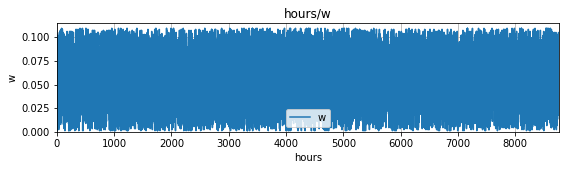

In [34]:
t_tv_led_standby_d_t = import_schedule_1_d_t()
t_tv_led_view_d_t = import_schedule_2_d_t()

x = np.arange(8760)
y = get_E_Elc_tv_led_d_t(0.15, t_tv_led_standby_d_t, 125, t_tv_led_view_d_t, 4)

plt.figure(figsize=(9,2))
plt.subplot(1,1,1)
plt.plot(x, y, label="w")

plt.grid(True)

plt.title("hours/w")
plt.xlabel("hours")
plt.ylabel("w")

plt.xlim(0,8760)
plt.ylim(0,)

plt.legend()
plt.show()